In [1]:
from tensorflow import keras  # keras API

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(train_input.shape, test_input.shape) 

(60000, 28, 28) (10000, 28, 28)


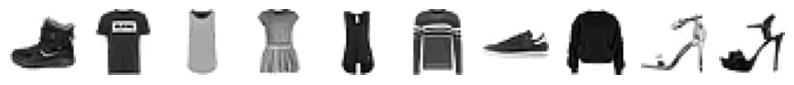

In [7]:
import matplotlib.pyplot as plt

# subplots -> 그래프 영역을 여러개 나눠서 출력

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off') # 좌표 출력 배제

plt.show()

In [9]:
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


In [12]:
# 확률적 경사 하강법 - SGDClassifier 
# 0~255
train_scaled = train_input / 255  # 0~1
train_scaled = train_scaled.reshape(-1, 28 * 28) # -1 모든 행, 60000

In [15]:
print(train_scaled.shape)

(60000, 784)


In [16]:
test_scaled = test_input / 255  # 0~1
test_scaled = test_scaled.reshape(-1, 28 * 28)

In [17]:
print(test_scaled.shape)

(10000, 784)


In [22]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10)
sc.fit(train_scaled, train_target) # 훈련

D:\mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10)

In [23]:
sc.score(test_scaled, test_target)

0.8281

In [24]:
sc.predict(test_scaled[:5])

array([7, 2, 1, 1, 0], dtype=uint8)

In [25]:
test_input2 = test_scaled.reshape(-1, 28, 28)

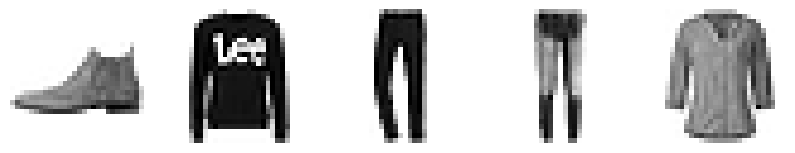

In [27]:
fig, axs = plt.subplots(1, 5, figsize=(10, 10))
for i in range(5):
    axs[i].imshow(test_input2[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [34]:
# 텐서플로 + 케라스 - 심층신경망(딥러닝)
input = keras.layers.Input(shape=(784,))  # 입력층 

dense2 = keras.layers.Dense(784, activation='sigmoid') # 밀집층, 활성화 함수 - sigmoid: OVR - One Versus Rest

dense = keras.layers.Dense(10, activation="softmax")  # 출력층, 활성화 함수 - softmax: 마지막층은 분류 확률을 구하는 거니깐!

In [35]:
# model = keras.Sequential([input, dense])
model = keras.Sequential()
model.add(input)  # 입력층
model.add(dense2) # 밀집층
model.add(dense) # 출력층

In [36]:
# model.compile()  # 손실 함수 처리 방식, 측정 지표 설정
# 이진분류 - binary_crossentropy
# 다중 분류 - categorical_crossentropy : One Hot Encoding을 필수로 해야함 
#             sparse_categorical_crossentropy : One Hot Encoding을 자동으로 알아서 해준다

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
# 학습 - 미니 배치 경사 하강법 / 32 - 1 에포크
model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8898 - loss: 0.2960
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8958 - loss: 0.2811
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9016 - loss: 0.2678
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9037 - loss: 0.2542
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9073 - loss: 0.2502
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9111 - loss: 0.2372
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9138 - loss: 0.2292
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9172 - loss: 0.2238
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9206 - loss: 0.2153
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9213 - loss: 0.2091


In [39]:
# 테스트 세트의 정확도
model.evaluate(train_scaled, train_target)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9301 - loss: 0.1871


[0.19009950757026672, 0.9289166927337646]

In [69]:
predictions = model.predict(test_scaled[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [70]:
print(predictions.argmax(axis=1))

[9 2 1 1 6 1 4 6 5 7]


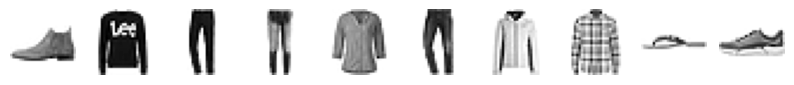

In [71]:
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(test_input[i], cmap='gray_r')
    axs[i].axis('off')

plt.show()